In [11]:
import utils
import numpy as np
from numba import jit
import cv2
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

(1024, 1280)


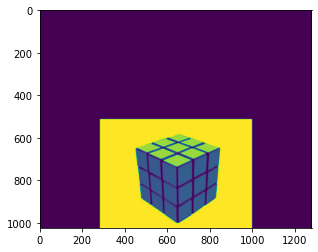

In [12]:
filename = "mej.png"
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
image = utils.window_image_for_holo(image)
imgplot = plt.imshow(image)
print(image.shape)


In [13]:
rng = np.random.default_rng()
I0 = 255 * rng.integers(0, 2, (utils.HologramHeight, utils.HologramWidth))
print(I0.shape)

H0 = utils.replay_field(I0)
print(H0.shape)

(1024, 1280)


ValueError: Shape and axes have different lengths.

In [7]:
rng = np.random.default_rng()
I0 = 255 * rng.integers(0, 2, (utils.HologramHeight, utils.HologramWidth))
cv2.imwrite("file.bmp", I0)

H0 = utils.replay_field(I0)

print(I0.shape, H0.shape)

C0 = np.sum(np.abs(image - H0))

@jit(forceobj=True)
def dbs(image):
    #Start with random array of binary phase pixels (represented as 0 or 255)
    print(image)
    rng = np.random.default_rng()
    I0 = 255 * rng.integers(0, 2, (utils.HologramHeight, utils.HologramWidth))
    cv2.imwrite("file.bmp", I0)

    H0 = utils.replay_field(I0)

    print(I0.shape, H0.shape)

    C0 = np.sum(np.abs(image - H0))

    for i in range(iterations):
        I1 = I0
        x = np.random.randint(0, utils.HologramWidth - 1)
        y = np.random.randint(0, utils.HologramHeight - 1)
        val = I1[y][x]
        if val == 0:
            I1[y][x] = 255
        else:
            I1[y][x] = 0
        
        H1 = utils.replay_field(I1)
        C1 = np.sum(np.abs(image - H1))

        if C1 < C0:
        # goldney's code use if C1>C0:
            I0 = I1
            C0 = C1
    
    return I0


ValueError: Shape and axes have different lengths.

In [17]:

filename = "mej.png"
image_name = filename.split('.')[0]
iterations = 10000

#cv2.imread(path, flag) method loads an image from the specified file; flag: It specifies the way in which image should be read. 
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
image = utils.window_image_for_holo(image)

hologram = dbs(image)
cv2.imwrite("holo_" + image_name + ".bmp", hologram)

#cv2.imshow('Generated Hologram', hologram)
#cv2.waitKey(0)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1024, 1280) (1024, 1280)


True

In [18]:
original = "file.bmp"
image1 = cv2.imread(original,cv2.IMREAD_GRAYSCALE)
H0 = utils.replay_field(image1)
C0 = np.sum(np.abs(image - H0))

final = "holo_mej.bmp"
image2 = cv2.imread(final,cv2.IMREAD_GRAYSCALE)
H1 = utils.replay_field(image2)
C1 = np.sum(np.abs(image - H1))

print(C0)
print(C1)

150652533.4300998
150641008.62973884


(1024, 1280, 3)


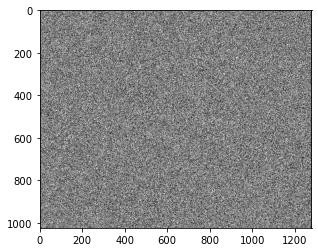

In [53]:
filename = "holo_mej_03.bmp"
image = cv2.imread(filename, cv2.IMREAD_COLOR)
#image = utils.window_image_for_holo(image)
imgplot = plt.imshow(image)
print(image.shape)
#x=utils.replay_field(image)
#imgplot = plt.imshow(x)


ValueError: Shape and axes have different lengths.

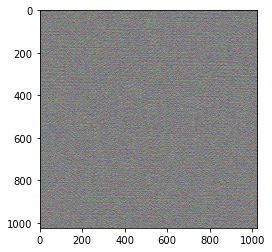

In [18]:
filename = "test.bmp"
image = cv2.imread(filename)
imgplot = plt.imshow(image)
x=utils.replay_field(image)
print(x.shape)
plt.imshow(x, interpolation='none')
plt.show()

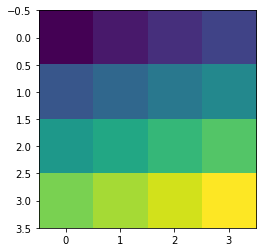

In [49]:
H = np.array([[1, 2, 3, 4],
          [5, 6, 7, 8],
          [9, 10, 11, 12],
          [13, 14, 15, 16]])

plt.imshow(H, interpolation='none')
plt.show()